<a href="https://colab.research.google.com/github/Kevinlee49/TensorFlow_PyTorch/blob/main/Tensorflow2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Tensorflow2/DATA/cancer_classification.csv')
df.describe()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


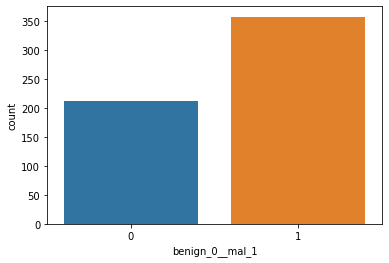

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

In [ ]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [ ]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

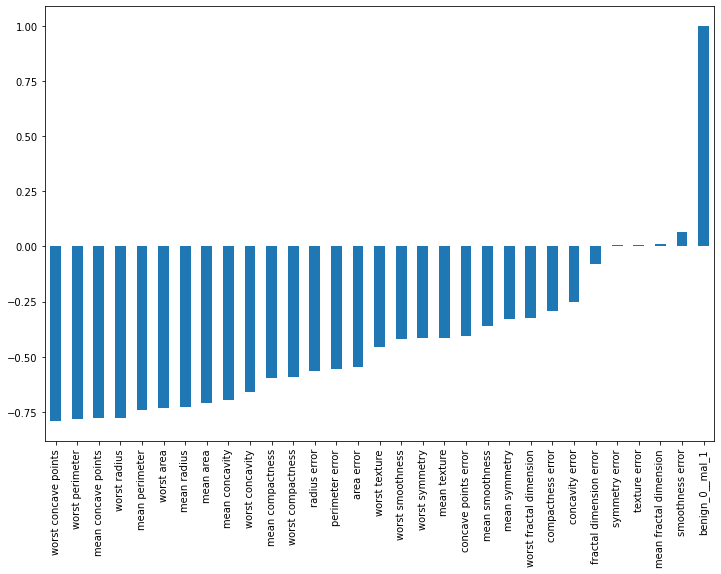

In [ ]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

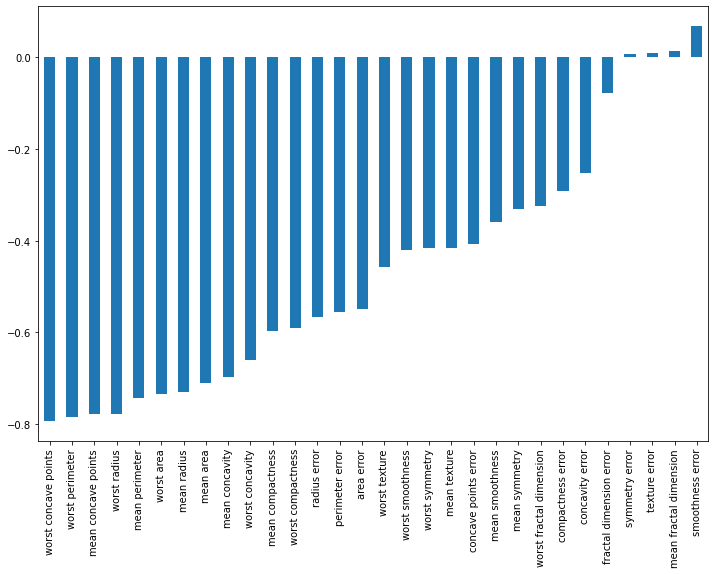

In [ ]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

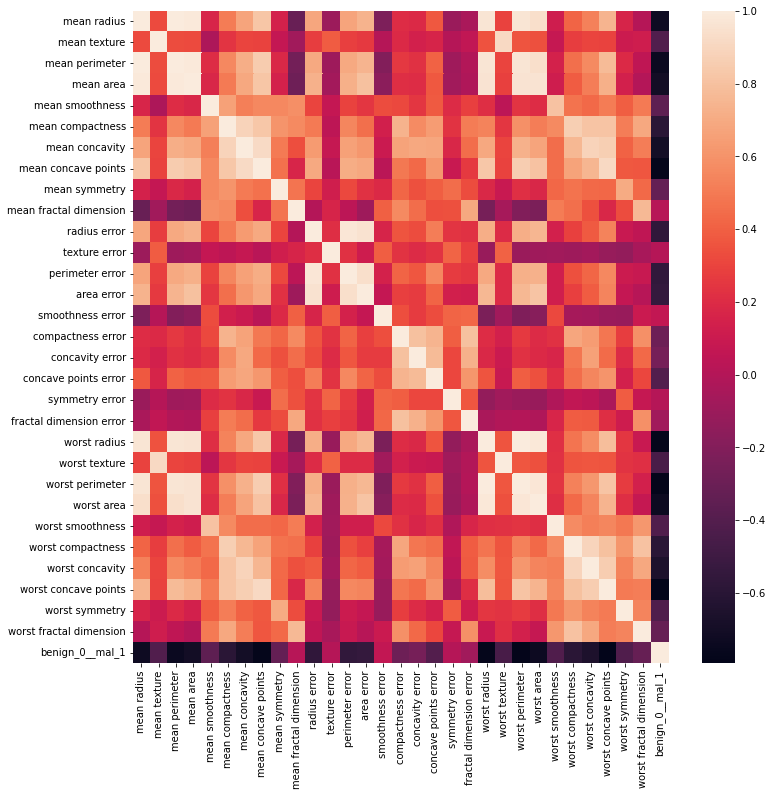

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid')) # binary classification
model.compile(loss= 'binary_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs = 500, validation_data = (X_test, y_test))

Epoch 1/500
14/14 [==============================] - 2s 32ms/step - loss: 0.6714 - val_loss: 0.6504
Epoch 2/500
14/14 [==============================] - 0s 10ms/step - loss: 0.6434 - val_loss: 0.6198
Epoch 3/500
14/14 [==============================] - 0s 15ms/step - loss: 0.6106 - val_loss: 0.5748
Epoch 4/500
14/14 [==============================] - 0s 7ms/step - loss: 0.5685 - val_loss: 0.5262
Epoch 5/500
14/14 [==============================] - 0s 8ms/step - loss: 0.5234 - val_loss: 0.4745
Epoch 6/500
14/14 [==============================] - 0s 8ms/step - loss: 0.4747 - val_loss: 0.4184
Epoch 7/500
14/14 [==============================] - 0s 11ms/step - loss: 0.4242 - val_loss: 0.3639
Epoch 8/500
14/14 [==============================] - 0s 7ms/step - loss: 0.3734 - val_loss: 0.3109
Epoch 9/500
14/14 [==============================] - 0s 7ms/step - loss: 0.3281 - val_loss: 0.2665
Epoch 10/500
14/14 [==============================] - 0s 7ms/step - loss: 0.2926 - val_loss: 0.2335
Epoch

In [ ]:
model.history.history

{'loss': [0.6714403629302979,
  0.6433969140052795,
  0.6106314659118652,
  0.5685187578201294,
  0.5233983397483826,
  0.47468918561935425,
  0.42419418692588806,
  0.37338680028915405,
  0.3281106948852539,
  0.2926350235939026,
  0.2647186517715454,
  0.2411772608757019,
  0.22287343442440033,
  0.209737166762352,
  0.1960209608078003,
  0.19061769545078278,
  0.17820890247821808,
  0.17266976833343506,
  0.16227953135967255,
  0.15411876142024994,
  0.15099839866161346,
  0.14319676160812378,
  0.13777650892734528,
  0.1331118494272232,
  0.13003449141979218,
  0.1252676397562027,
  0.12645262479782104,
  0.11573892831802368,
  0.11463546007871628,
  0.11060304939746857,
  0.10519368946552277,
  0.10662893950939178,
  0.10442313551902771,
  0.1028289869427681,
  0.10167618840932846,
  0.09787767380475998,
  0.0985531434416771,
  0.09196927398443222,
  0.08975648880004883,
  0.0888446569442749,
  0.08540581166744232,
  0.08152716606855392,
  0.0803489163517952,
  0.07942812889814377

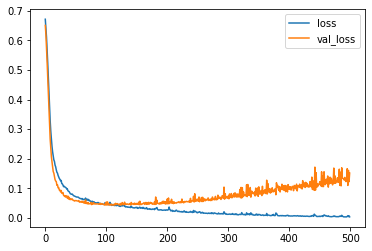

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot() # overfitting, val_loss became increasing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [ ]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid')) # binary classification
model.compile(loss= 'binary_crossentropy', optimizer = 'adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = min, verbose =1, patience=25) # mode - min,max,auto

In [ ]:
model.fit(x=X_train, y=y_train, epochs = 500, validation_data = (X_test, y_test),callbacks = [early_stop])

Epoch 1/500
14/14 [==============================] - 1s 16ms/step - loss: 0.6846 - val_loss: 0.6552
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6477 - val_loss: 0.6225
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6202 - val_loss: 0.5860
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5858 - val_loss: 0.5444
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5471 - val_loss: 0.4979
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5046 - val_loss: 0.4474
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4589 - val_loss: 0.3957
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4148 - val_loss: 0.3486
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3728 - val_loss: 0.3097
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3396 - val_loss: 0.2774
Epoch 11

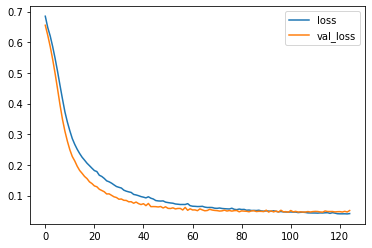

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5)) # 0.2 0.5 are common value for this
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid')) # binary classification
model.compile(loss= 'binary_crossentropy', optimizer = 'adam')

In [ ]:
len(y_train)

426

In [ ]:
model.fit(x=X_train, y=y_train, epochs = 100, validation_data = (X_test, y_test),
          callbacks = [early_stop])

Epoch 1/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0801 - val_loss: 0.0515
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0817 - val_loss: 0.0632
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0737 - val_loss: 0.0515
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0821 - val_loss: 0.0477
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0961 - val_loss: 0.0559
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0805 - val_loss: 0.0549
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0716 - val_loss: 0.0573
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0767 - val_loss: 0.0567
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0851 - val_loss: 0.0471
Epoch 10/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0715 - val_loss: 0.0597
Epoch 11/

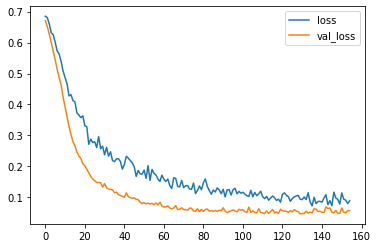

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

AttributeError: ignored